In [1]:
library('tidyverse')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
nw001_dominant_tras <-
    c('CAMRDGNNRLAF', 'CAVRSLRRF', 'CVVTYTGKLIF')

https://www.10xgenomics.com/support/software/cell-ranger/7.2/hidden/cr-5p-vdj-algorithm-inktmait

- TRAV/TRAJ:
  - TRAV1-2
  - Any of TRAJ33, TRAJ20, TRAJ12

- TRBV/TRBJ
  - TRBV20
  - TRBV6

In [3]:
mait_trav_chains <-
    c('TRAV1-2')

mait_traj_chains <-
    c('TRAJ33', 'TRAJ20', 'TRAJ12')

mait_trbv_chains <-
    c('TRBV20', 'TRBV6')

In [4]:
# https://github.com/10XGenomics/enclone/blob/cellranger5.0/enclone/src/human_iNKT_CDR3.json

mait_cdr3s <-
    jsonlite::read_json('../10X_human_MAIT_CDR3.json') %>%
    map_df(~tibble(`cdr3`=unlist(.$`cdr3`), `pubmed_id`=unlist(.$`id`)))

mait_cdr3s

cdr3,pubmed_id
<chr>,<chr>
CAVNGDDYKLSF,PMC4113934
CAVRDSDYKLSF,PMC4113934
CAVSLQDYKLSF,PMC4113934
CAVRDGDYKLSF,PMC4113934
CAVRDSNYQLIW,PMC4113934
CAVRDSNYQLIQW,PMC4113934
CAAMDSNYQLIW,PMC4113934
CAVLDSNYQLIW,PMC4113934
CARSDSNYQLIW,PMC4113934


In [5]:
read_tsv('MAITMATCH_results_20240501.tsv') %>%
    head()

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 176625 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Res, Sequence, MAIT_hit
dbl (1): Score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Res,Sequence,MAIT_hit,Score
<chr>,<chr>,<chr>,<dbl>
Best,ALGVLHC,CALNDMRF,0.8199
Best,AGIAYQLIW,CAAIDSNYQLIW,0.8347
Best,AATKLIF,CALNDMRF,0.8445
Best,AGCVIQEGADGLTF,CAVLGQAGTALIF,0.8222
Best,AHIDRDYEQYF,CAVRDRDYKLSF,0.8291
Best,AMPLMF,CALNDMRF,0.8110


In [6]:
mait_cdr3_scores <-
    read_tsv('MAITMATCH_results_20240501.tsv') %>%
    filter(`Score` > 0.90)

mait_cdr3_scores

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 176625 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Res, Sequence, MAIT_hit
dbl (1): Score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Res,Sequence,MAIT_hit,Score
<chr>,<chr>,<chr>,<dbl>
Best,AVLMDSNYQLIW,CAIMDSNYQLIW,0.9557
Best,GISGSARQLTF,CAPSGSARQLTF,0.9261
Best,ILTTSGTYKYIF,CVVSSSGTYKYIF,0.9186
Best,CADRDDKIIF,CAVRRDDKIIF,0.9127
Best,CAPTGTASKLTF,CAGGTGTASKLTF,0.9067
Best,CAVGGDYKLSF,CAVSGDYKLSF,0.9607
Best,CAAGGNRLAF,CAAGGQNFVF,0.9047
Best,CAAGTGQNFVF,CAAGGQNFVF,0.9214
Best,CAAGWQNFVF,CAAGGQNFVF,0.9102


# Most recent RNA and DNA punches

In [7]:
list.files('NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448')

[1] "metadata.tsv" "README.md"    "results"

In [8]:
punches_metadata_tbl <-
    read_tsv('NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/metadata.tsv') %>%
    # "NMS22 8647 tumor" -> "tumor" 
    rename(
        `cellecta_sample_name`=`Sample Name`,
        `sample_material`=`Sample Type`,
        `description`=`Description`
    ) %>%
    mutate(
        `punch_region`=str_replace(`description`, '.*[0-9] ', ''),
        `tumor_name`=str_replace(`description`, ' [tca].*', '')
    )

punches_metadata_tbl

Rows: 28 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Sample Name, Sample Type, Description

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cellecta_sample_name,sample_material,description,punch_region,tumor_name
<chr>,<chr>,<chr>,<chr>,<chr>
115124DN,DNA,NMS22 8647 tumor,tumor,NMS22 8647
115125DN,DNA,NMS23 471 tumor,tumor,NMS23 471
115126DN,DNA,S10-479 tumor,tumor,S10-479
115127DN,DNA,S08-25548 tumor,tumor,S08-25548
115128DN,DNA,NMS22 28934 tumor,tumor,NMS22 28934
115129DN,DNA,NMS23 471 cluster,cluster,NMS23 471
115130DN,DNA,S10-479 cluster,cluster,S10-479
115131DN,DNA,S08-25548 cluster,cluster,S08-25548
115132DN,DNA,NMS22 28934 cluster,cluster,NMS22 28934


In [9]:
list.files('NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/')

[1] "115124DN_S15.align.report.json"    "115124DN_S15.align.report.txt"    
  [3] "115124DN_S15.assemble.report.json" "115124DN_S15.assemble.report.txt" 
  [5] "115124DN_S15.clns"                 "115124DN_S15.clones_IGK.tsv"      
  [7] "115124DN_S15.clones_TRA.tsv"       "115124DN_S15.clones_TRB.tsv"      
  [9] "115124DN_S15.clones_TRD.tsv"       "115124DN_S15.clones_TRG.tsv"      
 [11] "115124DN_S15.qc.json"              "115124DN_S15.qc.txt"              
 [13] "115124DN_S15.refine.report.json"   "115124DN_S15.refine.report.txt"   
 [15] "115124RN_S1.align.report.json"     "115124RN_S1.align.report.txt"     
 [17] "115124RN_S1.assemble.report.json"  "115124RN_S1.assemble.report.txt"  
 [19] "115124RN_S1.clns"                  "115124RN_S1.clones_TRA.tsv"       
 [21] "115124RN_S1.clones_TRB.tsv"        "115124RN_S1.qc.json"              
 [23] "115124RN_S1.qc.txt"                "115124RN_S1.refine.report.json"   
 [25] "115124RN_S1.refine.report.txt"     "115125DN_S16.align.report.json"   
 [27] "115125DN_S16.align.report.txt"     "115125DN_S16.assemble.report.json"
 [29] "115125DN_S16.assemble.report.txt"  "115125DN_S16.clns"                
 [31] "115125DN_S16.clones_TRA.tsv"       "115125DN_S16.clones_TRB.tsv"      
 [33] "115125DN_S16.clones_TRD.tsv"       "115125DN_S16.clones_TRG.tsv"      
 [35] "115125DN_S16.qc.json"              "115125DN_S16.qc.txt"              
 [37] "115125DN_S16.refine.report.json"   "115125DN_S16.refine.report.txt"   
 [39] "115125RN_S2.align.report.json"     "115125RN_S2.align.report.txt"     
 [41] "115125RN_S2.assemble.report.json"  "115125RN_S2.assemble.report.txt"  
 [43] "115125RN_S2.clns"                  "115125RN_S2.clones_IGK.tsv"       
 [45] "115125RN_S2.clones_TRA.tsv"        "115125RN_S2.clones_TRB.tsv"       
 [47] "115125RN_S2.clones_TRD.tsv"        "115125RN_S2.clones_TRG.tsv"       
 [49] "115125RN_S2.qc.json"               "115125RN_S2.qc.txt"               
 [51] "115125RN_S2.refine.report.json"    "115125RN_S2.refine.report.txt"    
 [53] "115126DN_S17.align.report.json"    "115126DN_S17.align.report.txt"    
 [55] "115126DN_S17.assemble.report.json" "115126DN_S17.assemble.report.txt" 
 [57] "115126DN_S17.clns"                 "115126DN_S17.clones_TRA.tsv"      
 [59] "115126DN_S17.clones_TRB.tsv"       "115126DN_S17.clones_TRD.tsv"      
 [61] "115126DN_S17.clones_TRG.tsv"       "115126DN_S17.qc.json"             
 [63] "115126DN_S17.qc.txt"               "115126DN_S17.refine.report.json"  
 [65] "115126DN_S17.refine.report.txt"    "115126RN_S3.align.report.json"    
 [67] "115126RN_S3.align.report.txt"      "115126RN_S3.assemble.report.json" 
 [69] "115126RN_S3.assemble.report.txt"   "115126RN_S3.clns"                 
 [71] "115126RN_S3.clones_TRA.tsv"        "115126RN_S3.clones_TRB.tsv"       
 [73] "115126RN_S3.clones_TRG.tsv"        "115126RN_S3.qc.json"              
 [75] "115126RN_S3.qc.txt"                "115126RN_S3.refine.report.json"   
 [77] "115126RN_S3.refine.report.txt"     "115127DN_S18.align.report.json"   
 [79] "115127DN_S18.align.report.txt"     "115127DN_S18.assemble.report.json"
 [81] "115127DN_S18.assemble.report.txt"  "115127DN_S18.clns"                
 [83] "115127DN_S18.clones_IGK.tsv"       "115127DN_S18.clones_TRA.tsv"      
 [85] "115127DN_S18.clones_TRB.tsv"       "115127DN_S18.clones_TRG.tsv"      
 [87] "115127DN_S18.qc.json"              "115127DN_S18.qc.txt"              
 [89] "115127DN_S18.refine.report.json"   "115127DN_S18.refine.report.txt"   
 [91] "115127RN_S4.align.report.json"     "115127RN_S4.align.report.txt"     
 [93] "115127RN_S4.assemble.report.json"  "115127RN_S4.assemble.report.txt"  
 [95] "115127RN_S4.clns"                  "115127RN_S4.clones_IGK.tsv"       
 [97] "115127RN_S4.clones_TRA.tsv"        "115127RN_S4.clones_TRB.tsv"       
 [99] "115127RN_S4.clones_TRG.tsv"        "115127RN_S4.qc.json"              
[101] "115127RN_S4.qc.txt"                "115127RN_S4.refine.report.json"   
[103] "115127RN_S4.refin

In [10]:
list.files('NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/', pattern='^115124.*')

[1] "115124DN_S15.align.report.json"    "115124DN_S15.align.report.txt"    
 [3] "115124DN_S15.assemble.report.json" "115124DN_S15.assemble.report.txt" 
 [5] "115124DN_S15.clns"                 "115124DN_S15.clones_IGK.tsv"      
 [7] "115124DN_S15.clones_TRA.tsv"       "115124DN_S15.clones_TRB.tsv"      
 [9] "115124DN_S15.clones_TRD.tsv"       "115124DN_S15.clones_TRG.tsv"      
[11] "115124DN_S15.qc.json"              "115124DN_S15.qc.txt"              
[13] "115124DN_S15.refine.report.json"   "115124DN_S15.refine.report.txt"   
[15] "115124RN_S1.align.report.json"     "115124RN_S1.align.report.txt"     
[17] "115124RN_S1.assemble.report.json"  "115124RN_S1.assemble.report.txt"  
[19] "115124RN_S1.clns"                  "115124RN_S1.clones_TRA.tsv"       
[21] "115124RN_S1.clones_TRB.tsv"        "115124RN_S1.qc.json"              
[23] "115124RN_S1.qc.txt"                "115124RN_S1.refine.report.json"   
[25] "115124RN_S1.refine.report.txt"

In [11]:
punch_tra_files <-
    list.files('NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results', pattern='.clones_TRA', full.names=TRUE)

punch_tra_files

[1] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115124DN_S15.clones_TRA.tsv"
 [2] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115124RN_S1.clones_TRA.tsv" 
 [3] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115125DN_S16.clones_TRA.tsv"
 [4] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115125RN_S2.clones_TRA.tsv" 
 [5] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115126DN_S17.clones_TRA.tsv"
 [6] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115126RN_S3.clones_TRA.tsv" 
 [7] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115127DN_S18.clones_TRA.tsv"
 [8] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115127RN_S4.clones_TRA.tsv" 
 [9] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115128DN_S19.clones_TRA.tsv"
[10] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115128RN_S5.clones_TRA.tsv" 
[11] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115129DN_S20.clones_TRA.tsv"
[12] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115129RN_S6.clones_TRA.tsv" 
[13] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115130DN_S21.clones_TRA.tsv"
[14] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115130RN_S7.clones_TRA.tsv" 
[15] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115131DN_S22.clones_TRA.tsv"
[16] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115131RN_S8.clones_TRA.tsv" 
[17] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115132DN_S23.clones_TRA.tsv"
[18] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115132RN_S9.clones_TRA.tsv" 
[19] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115133DN_S24.clones_TRA.tsv"
[20] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115133RN_S10.clones_TRA.tsv"
[21] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115134DN_S25.clones_TRA.tsv"
[22] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115134RN_S11.clones_TRA.tsv"
[23] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115135DN_S26.clones_TRA.tsv"
[24] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115135RN_S12.clones_TRA.tsv"
[25] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115136DN_S27.clones_TRA.tsv"
[26] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115136RN_S13.clones_TRA.tsv"
[27] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115137DN_S28.clones_TRA.tsv"
[28] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115137RN_S14.clones_TRA.tsv"

In [12]:
punch_tra_files_tbl <-
    tibble(`file_path`=punch_tra_files) %>%
    mutate(
        `file_name`=str_replace_all(`file_path`, '.*/', ''),
        `cellecta_sample_name`=str_replace_all(`file_name`, '_.*', '')
    )

punch_tra_files_tbl

file_path,file_name,cellecta_sample_name
<chr>,<chr>,<chr>
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115124DN_S15.clones_TRA.tsv,115124DN_S15.clones_TRA.tsv,115124DN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115124RN_S1.clones_TRA.tsv,115124RN_S1.clones_TRA.tsv,115124RN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115125DN_S16.clones_TRA.tsv,115125DN_S16.clones_TRA.tsv,115125DN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115125RN_S2.clones_TRA.tsv,115125RN_S2.clones_TRA.tsv,115125RN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115126DN_S17.clones_TRA.tsv,115126DN_S17.clones_TRA.tsv,115126DN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115126RN_S3.clones_TRA.tsv,115126RN_S3.clones_TRA.tsv,115126RN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115127DN_S18.clones_TRA.tsv,115127DN_S18.clones_TRA.tsv,115127DN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115127RN_S4.clones_TRA.tsv,115127RN_S4.clones_TRA.tsv,115127RN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115128DN_S19.clones_TRA.tsv,115128DN_S19.clones_TRA.tsv,115128DN


In [13]:
punch_tra_combined_tbl <-
    punch_tra_files_tbl %>%
    pull(`file_path`) %>%
    map_df(function(one_file_path) {
        read_tsv(one_file_path, show_col_types=FALSE) %>%
            mutate(`file_path`=one_file_path)
    }) %>%
    left_join(punch_tra_files_tbl, by='file_path') %>%
    select(-`file_path`, `file_name`) %>%
    relocate(`cellecta_sample_name`) %>%
    left_join(punches_metadata_tbl, by='cellecta_sample_name') %>%
    mutate(`is_MAIT`=`aaSeqCDR3` %in% mait_cdr3_scores$`Sequence`)

punch_tra_combined_tbl %>%
    head()

cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name,sample_material,description,punch_region,tumor_name,is_MAIT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
115124DN,7,261449,0.07963676,2,0.050,TGTGCTTTCTCTGGGGGTGAGATAGCAACTATCAGTTAATCTGG,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV38-1*00(549.1),NA,⋯,TGTGCTTTCTCTGGGGGTGAGATAGCAACTATCAGTTAATCTGG,58,CAFSGGE_SNYQLIW,:::::::::0:-8:9:::::20:-2:44:::,115124DN_S15.clones_TRA.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE
115124DN,30,204569,0.06231124,1,0.025,TGTGCTACTTGAATCTTAAATAACTGACAGCTGGGGGAAATTGCAGTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV17*00(876.9),NA,⋯,TGTGCTACTTGAATCTTAAATAACTGACAGCTGGGGGAAATTGCAGTTT,45,CAT*ILNN_DSWGKLQF,:::::::::0:-5:8:::::21:-4:49:::,115124DN_S15.clones_TRA.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE
115124DN,15,201417,0.06135115,1,0.025,TGTCTTCTGGGAGAAGACAATGACATGCGCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV40*00(918.4),NA,⋯,TGTCTTCTGGGAGAAGACAATGACATGCGCTTT,45,CLLGEDNDMRF,:::::::::0:0:14:::::16:-6:33:::,115124DN_S15.clones_TRA.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE
115124DN,8,194212,0.05915653,2,0.050,TGTGCTGGGCAGGAGGCCAGACTCATGTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV35*00(668.9),NA,⋯,TGTGCTGGGCAGGAGGCCAGACTCATGTTT,58,CAGQEARLMF,:::::::::0:0:12:::::15:-11:30:::,115124DN_S15.clones_TRA.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE
115124DN,25,190511,0.05802921,1,0.025,TGTGCTGCGTTGAATTATGGAGGAAGCCAAGGAAATCTCATCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV35*00(460.1),NA,⋯,TGTGCTGCGTTGAATTATGGAGGAAGCCAAGGAAATCTCATCTTT,45,CAALNYGGSQGNLIF,:::::::::0:-5:7:::::10:0:45:::,115124DN_S15.clones_TRA.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE
115124DN,73,179686,0.05473194,1,0.025,TGTGCAGCAAAAGACGGGGGTTACCAGAAAGTTACCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV29/DV5*00(510),NA,⋯,TGTGCAGCAAAAGACGGGGGTTACCAGAAAGTTACCTTT,45,CAAKDGGYQKVTF,:::::::::0:-3:10:::::15:-8:39:::,115124DN_S15.clones_TRA.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE


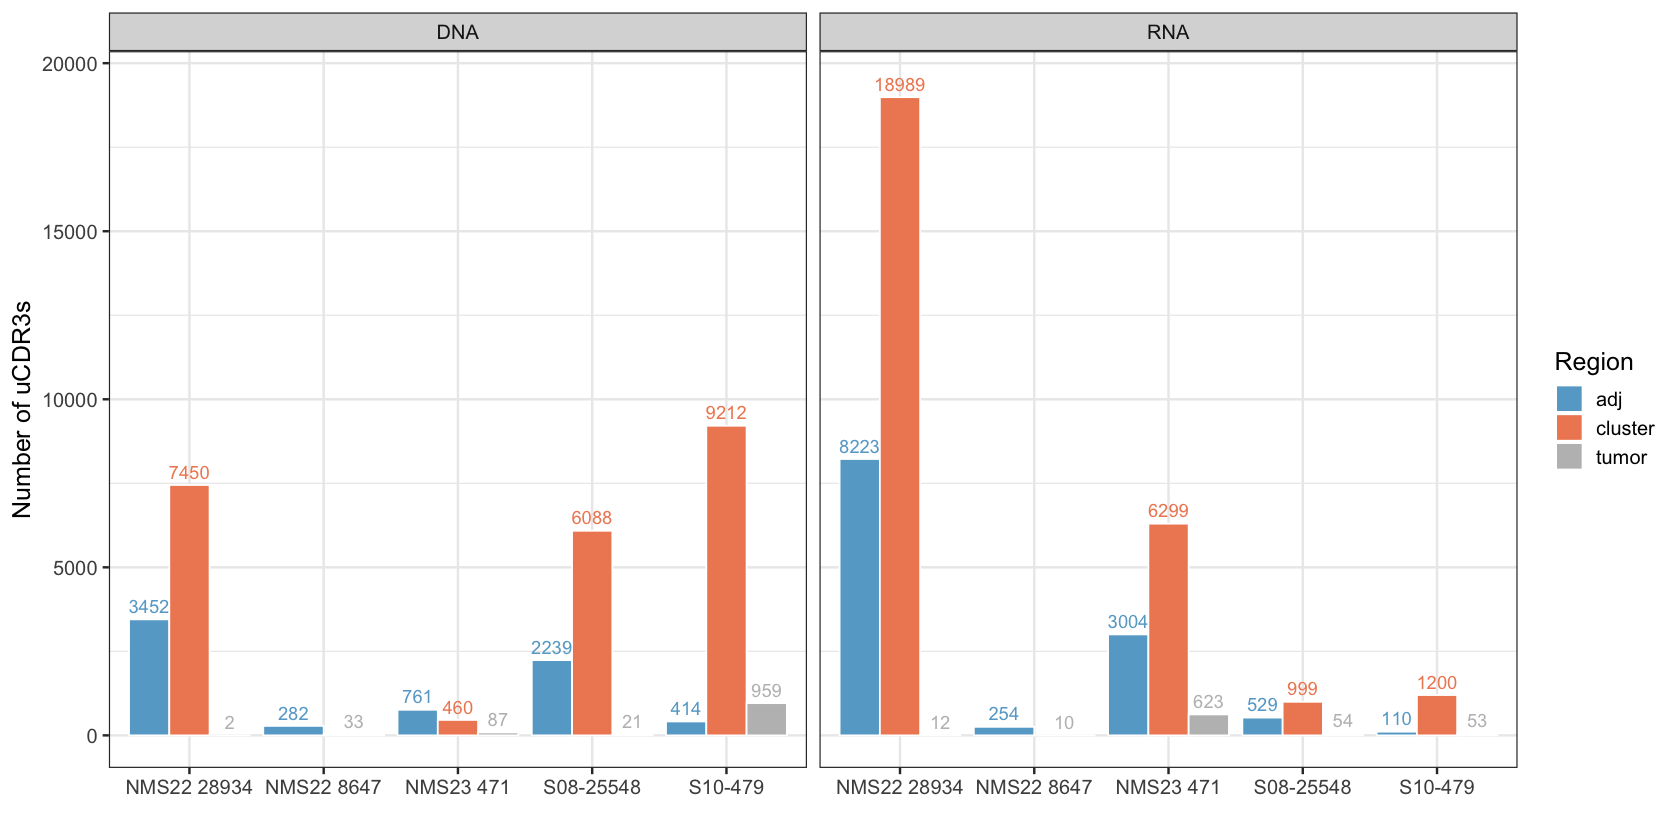

In [14]:
options(repr.plot.width=14, repr.plot.heigh=10)

punch_plot <-
    punch_tra_combined_tbl %>%
    distinct(`tumor_name`, `sample_material`, `punch_region`, `aaSeqCDR3`) %>%
    count(`tumor_name`, `sample_material`, `punch_region`) %>%
    ggplot(aes(x=`tumor_name`, y=`n`, fill=`punch_region`)) +
        geom_col(position='dodge', color='white') +
        geom_text(position=position_dodge(width = .9), aes(label=`n`, y=`n`+400, color=`punch_region`)) +
        facet_wrap(~`sample_material`, ncol=2) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Number of uCDR3s',
            fill='Region',
            color='Region'
        ) +
        scale_fill_manual(values=c('#67a9cf', '#ef8a62', 'gray')) +
        scale_color_manual(values=c('#67a9cf', '#ef8a62', 'gray'))

punch_plot

options(org_opts)

In [34]:
ggsave(punch_plot, filename='Sarcoma-TCR_punch_plot.svg', height=10, width=14)

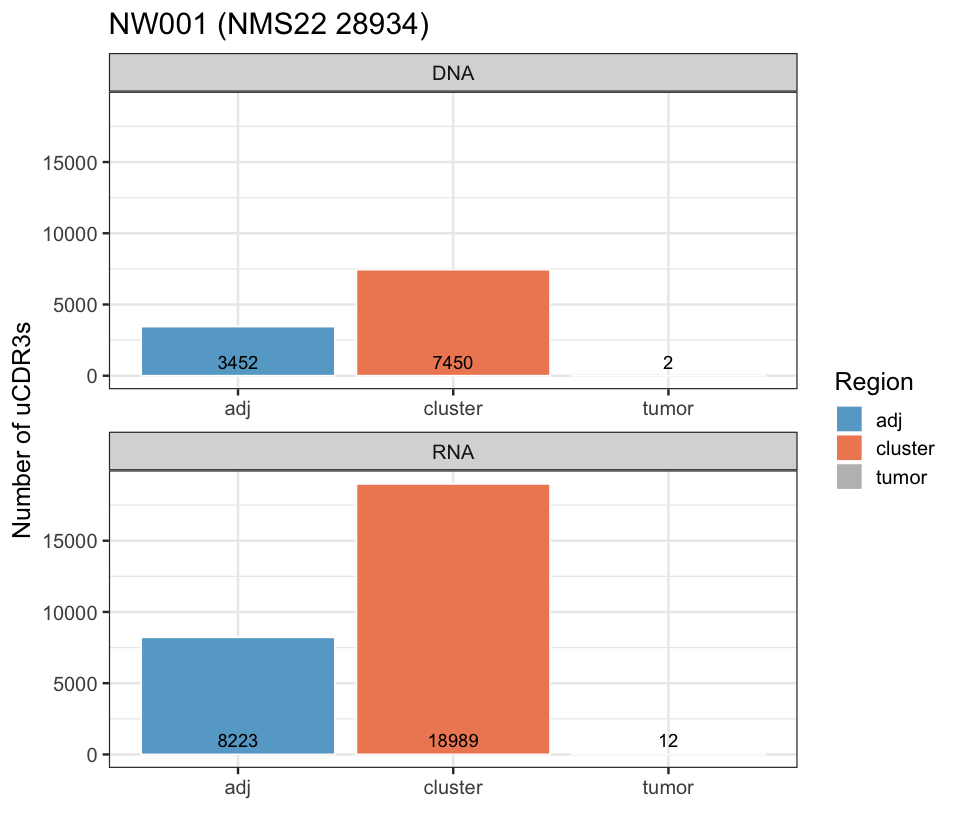

In [15]:
options(repr.plot.width=8, repr.plot.heigh=8)

punch_tra_combined_tbl %>%
    filter(`tumor_name` == 'NMS22 28934') %>%
    distinct(`tumor_name`, `sample_material`, `punch_region`, `aaSeqCDR3`) %>%
    count(`tumor_name`, `sample_material`, `punch_region`) %>%
    ggplot(aes(x=`punch_region`, y=`n`, fill=`punch_region`)) +
        geom_col(position='dodge', color='white') +
        facet_wrap(~`sample_material`, ncol=1, scales='free_x') +
        geom_text(y=1000, aes(label=`n`)) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Number of uCDR3s',
            fill='Region',
            title='NW001 (NMS22 28934)'
        ) +
        scale_fill_manual(values=c('#67a9cf', '#ef8a62', 'gray'))

options(org_opts)

In [16]:
punch_tra_combined_tbl %>%
    filter(`aaSeqCDR3` %in% nw001_dominant_tras)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name,sample_material,description,punch_region,tumor_name,is_MAIT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>


In [17]:
punch_tra_combined_tbl %>%
    filter(`tumor_name` == 'NMS22 28934', `punch_region` == 'tumor') %>%
    mutate(
        `Fraction`=scales::percent(`readFraction`, accuracy=.1),
        `MAIT`=if_else(`is_MAIT`, 'Yes', '')
    ) %>%
    select(
        `Material`=`sample_material`,
        `CDR3`=`aaSeqCDR3`,
        `MAIT`,
        `Fraction`
    )

Material,CDR3,MAIT,Fraction
<chr>,<chr>,<chr>,<chr>
DNA,CAVRDPR_FGNVLHC,,53.7%
DNA,CAFLDSNYQLIW,Yes,46.3%
RNA,CAGQGGLAGGTSYGKLTF,,12.3%
RNA,CAVFTGGGNKLTF,,11.8%
RNA,CAVRPLGGYNKLIF,,10.5%
RNA,CAARGYNAGNMLTF,,9.7%
RNA,CAVSWTGNQFYF,,9.5%
RNA,CAASIRTSGSRLTF,,9.2%
RNA,CALLPSEELVF,,9.1%


In [18]:
punch_tra_combined_tbl %>%
    filter(`tumor_name` == 'NMS22 28934', `punch_region` == 'tumor') %>%
    group_by(`tumor_name`, `sample_material`, `is_MAIT`) %>%
    summarize(`total_fraction`=sum(`readFraction`), `total_n`=n(), .groups='drop')

tumor_name,sample_material,is_MAIT,total_fraction,total_n
<chr>,<chr>,<lgl>,<dbl>,<int>
NMS22 28934,DNA,FALSE,0.53674028,1
NMS22 28934,DNA,TRUE,0.46325972,1
NMS22 28934,RNA,FALSE,0.90454213,10
NMS22 28934,RNA,TRUE,0.09545787,2


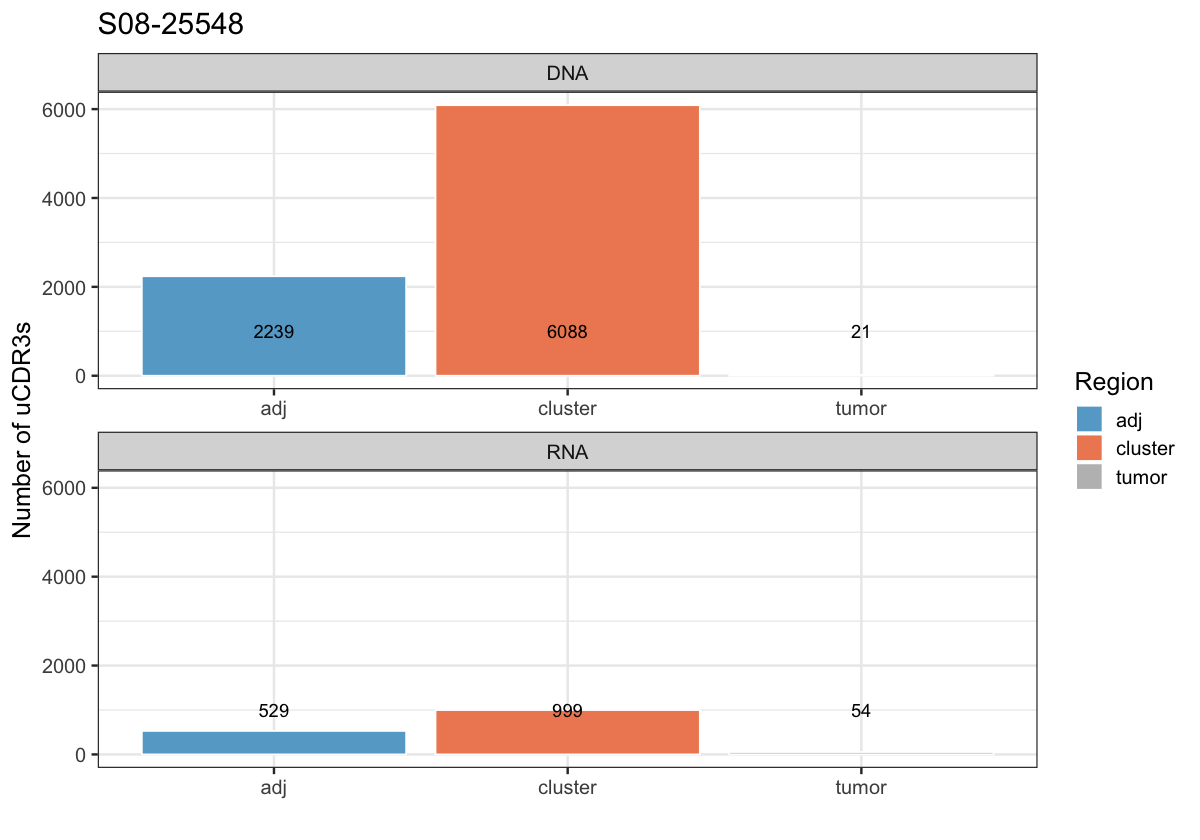

In [19]:
options(repr.plot.width=10, repr.plot.heigh=10)

punch_tra_combined_tbl %>%
    filter(`tumor_name` == 'S08-25548') %>%
    distinct(`tumor_name`, `sample_material`, `punch_region`, `aaSeqCDR3`) %>%
    count(`tumor_name`, `sample_material`, `punch_region`) %>%
    ggplot(aes(x=`punch_region`, y=`n`, fill=`punch_region`)) +
        geom_col(position='dodge', color='white') +
        facet_wrap(~`sample_material`, ncol=1, scales='free_x') +
        geom_text(y=1000, aes(label=`n`)) +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Number of uCDR3s',
            fill='Region',
            title='S08-25548'
        ) +
        scale_fill_manual(values=c('#67a9cf', '#ef8a62', 'gray'))

options(org_opts)

In [20]:
punch_tra_combined_tbl %>%
    filter(`tumor_name` == 'NMS22 28934', `punch_region` == 'tumor') %>%
    filter(`is_MAIT`)

cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name,sample_material,description,punch_region,tumor_name,is_MAIT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
115128DN,1,105979,0.46325972,3,0.50000000,TGTGCCTTCCTAGATAGCAACTATCAGTTAATCTGG,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV24*00(478.5),NA,⋯,TGTGCCTTCCTAGATAGCAACTATCAGTTAATCTGG,58,CAFLDSNYQLIW,:::::::::0:-2:8:::::12:-2:36:::,115128DN_S19.clones_TRA.tsv,DNA,NMS22 28934 tumor,tumor,NMS22 28934,TRUE
115128RN,23,177186,0.07274001,1,0.07692308,TGTGCAGGGCGGGGGAACTATGGTCAGAATTTTGTCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV25*00(558.2),NA,⋯,TGTGCAGGGCGGGGGAACTATGGTCAGAATTTTGTCTTT,45,CAGRGNYGQNFVF,:::::::::0:1:10:::::10:0:39:::,115128RN_S5.clones_TRA.tsv,RNA,NMS22 28934 tumor,tumor,NMS22 28934,TRUE
115128RN,24,55338,0.02271786,1,0.07692308,TGTGCAATCGGCAACTTCAACAAATTTTACTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV14/DV4*00(439.3),NA,⋯,TGTGCAATCGGCAACTTCAACAAATTTTACTTT,45,CAIGNFNKFYF,:::::::::0:-9:8:::::11:-2:33:::,115128RN_S5.clones_TRA.tsv,RNA,NMS22 28934 tumor,tumor,NMS22 28934,TRUE


In [21]:
punch_tra_combined_tbl %>%
    filter(`is_MAIT`)

cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name,sample_material,description,punch_region,tumor_name,is_MAIT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
115124DN,1,176358,0.0537182392,3,0.075000000,TGTGCTGTGATGGATAGCAACTATCAGTTAATCTGG,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV1-2*00(657.9),NA,⋯,TGTGCTGTGATGGATAGCAACTATCAGTTAATCTGG,58,CAVMDSNYQLIW,:::::::::0:-4:10:::::10:0:36:::,115124DN_S15.clones_TRA.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,TRUE
115124DN,6,88158,0.0268527231,2,0.050000000,TGTGTTGTCACCCCATCAGGAGGAAGCTACATACCTACATTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV8-2*00(629.4),NA,⋯,TGTGTTGTCACCCCATCAGGAGGAAGCTACATACCTACATTT,58,CVVTPSGGSYIPTF,:::::::::0:-6:8:::::13:-2:42:::,115124DN_S15.clones_TRA.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,TRUE
115124DN,26,69757,0.0212478210,1,0.025000000,TGTGCTGCGGTGGATAACTATGGTCAGAATTTTGTCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV21*00(429),NA,⋯,TGTGCTGCGGTGGATAACTATGGTCAGAATTTTGTCTTT,45,CAAVDNYGQNFVF,:::::::::0:-5:7:::::11:-1:39:::,115124DN_S15.clones_TRA.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,TRUE
115124RN,2,385905,0.0976893812,76,0.137432188,TGTGCAGCCGTCAATGACATGCGCTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV13-1*00(552.9),NA,⋯,TGTGCAGCCGTCAATGACATGCGCTTT,58,CAAVNDMRF,:::::::::0:-5:8:::::11:-7:27:::,115124RN_S1.clones_TRA.tsv,RNA,NMS22 8647 tumor,tumor,NMS22 8647,TRUE
115125DN,6,86819,0.0310658663,2,0.021739130,TGTGCTGTGATGGATAGCAACTATCAGTTAATCTGG,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV1-2*00(658.3),NA,⋯,TGTGCTGTGATGGATAGCAACTATCAGTTAATCTGG,58,CAVMDSNYQLIW,:::::::::0:-4:10:::::10:0:36:::,115125DN_S16.clones_TRA.tsv,DNA,NMS23 471 tumor,tumor,NMS23 471,TRUE
115125DN,196,53696,0.0192136832,1,0.010869565,TGTGCAATGAGCGCGACAGGCTTTCAGAAACTTGTATTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV12-3*00(835.8),NA,⋯,TGTGCAATGAGCGCGACAGGCTTTCAGAAACTTGTATTT,45,CAMSATGFQKLVF,:::::::::0:2:15:::::15:-5:39:::,115125DN_S16.clones_TRA.tsv,DNA,NMS23 471 tumor,tumor,NMS23 471,TRUE
115125DN,62,52681,0.0188504925,1,0.010869565,TGTGCTGCTATGGATAGCAACTATCAGTTAATCTGG,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV1-2*00(628.3),NA,⋯,TGTGCTGCTATGGATAGCAACTATCAGTTAATCTGG,45,CAAMDSNYQLIW,:::::::::0:-7:7:::::9:1:36:::,115125DN_S16.clones_TRA.tsv,DNA,NMS23 471 tumor,tumor,NMS23 471,TRUE
115125DN,70,51578,0.0184558133,1,0.010869565,TGTGCCTTCATGGATAGCAACTATCAGTTAATCTGG,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV1-2*00(608.4),NA,⋯,TGTGCCTTCATGGATAGCAACTATCAGTTAATCTGG,45,CAFMDSNYQLIW,:::::::::0:-9:5:::::8:2:36:::,115125DN_S16.clones_TRA.tsv,DNA,NMS23 471 tumor,tumor,NMS23 471,TRUE
115125DN,34,40626,0.0145369318,1,0.010869565,TGTGCTCTCCGGATGGATAGCAGCTATAAATTGATCTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV6*00(447.7),NA,⋯,TGTGCTCTCCGGATGGATAGCAGCTATAAATTGATCTTC,45,CALRMDSSYKLIF,:::::::::0:-5:8:::::8:2:39:::,115125DN_S16.clones_TRA.tsv,DNA,NMS23 471 tumor,tumor,NMS23 471,TRUE


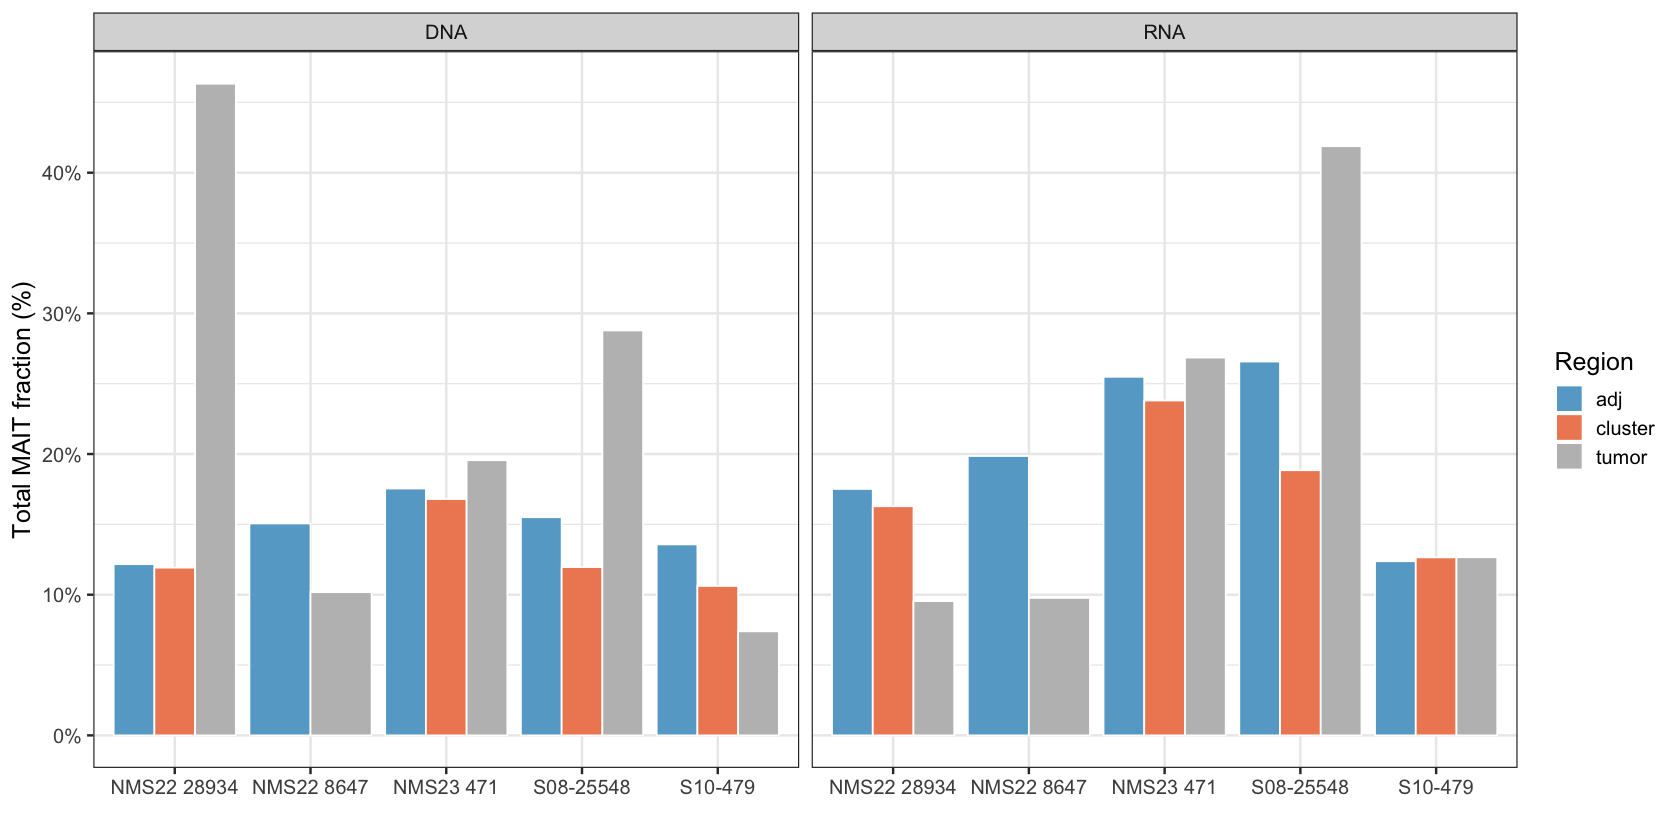

In [22]:
options(repr.plot.width=14, repr.plot.heigh=10)

punch_tra_combined_tbl %>%
    group_by(`tumor_name`, `sample_material`, `punch_region`, `is_MAIT`) %>%
    summarize(`total_frac`=sum(`readFraction`), .groups='drop') %>%
    filter(`is_MAIT`) %>%
    ggplot(aes(x=`tumor_name`, y=`total_frac`, fill=`punch_region`)) +
        geom_col(position='dodge', color='white') +
        facet_wrap(~`sample_material`, ncol=2, scales='free_x') +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Total MAIT fraction (%)',
            fill='Region'
        ) +
        scale_y_continuous(labels=scales::percent) +
        scale_fill_manual(values=c('#67a9cf', '#ef8a62', 'gray'))

options(org_opts)

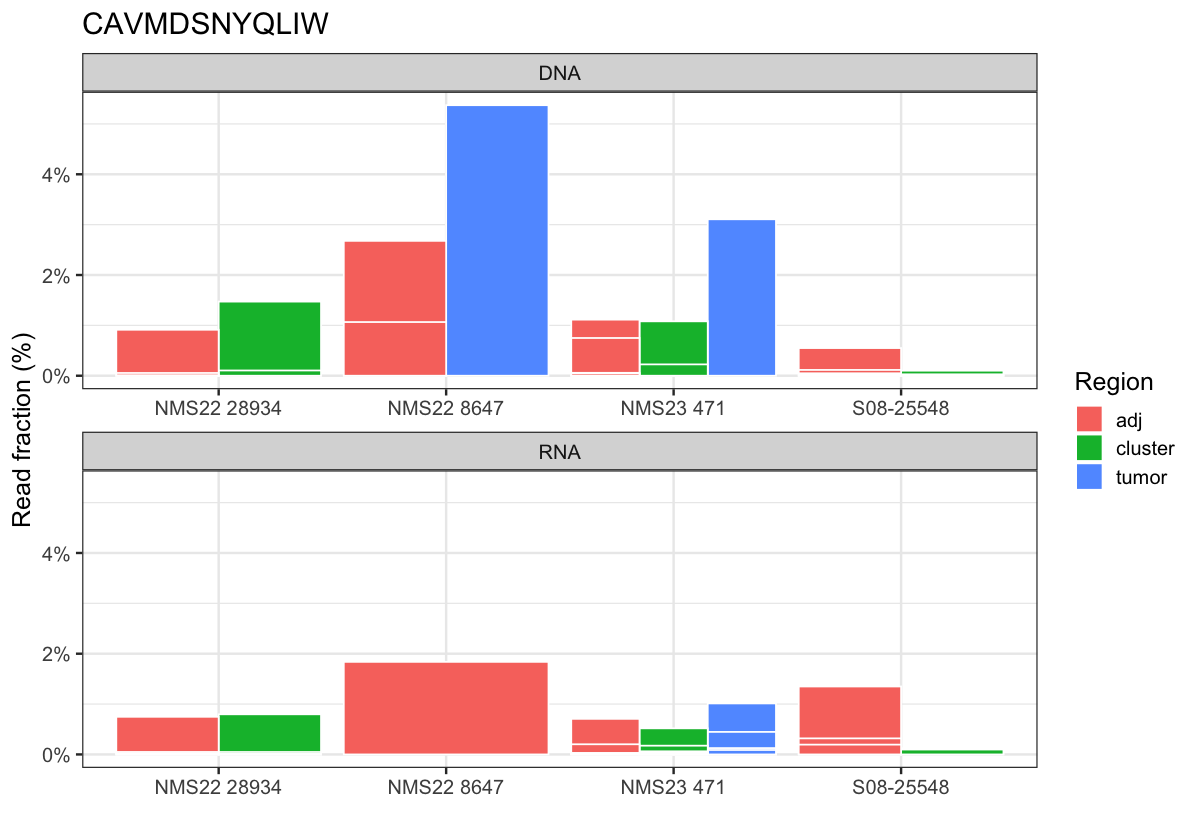

In [23]:
options(repr.plot.width=10, repr.plot.heigh=10)

punch_tra_combined_tbl %>%
    filter(`aaSeqCDR3` == 'CAVMDSNYQLIW') %>%
    ggplot(aes(x=`tumor_name`, y=`readFraction`, fill=`punch_region`)) +
        geom_col(position='dodge', color='white') +
        facet_wrap(~`sample_material`, ncol=1, scales='free_x') +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Read fraction (%)',
            fill='Region',
            title='CAVMDSNYQLIW'
        ) +
        scale_y_continuous(labels=scales::percent)
    
options(org_opts)

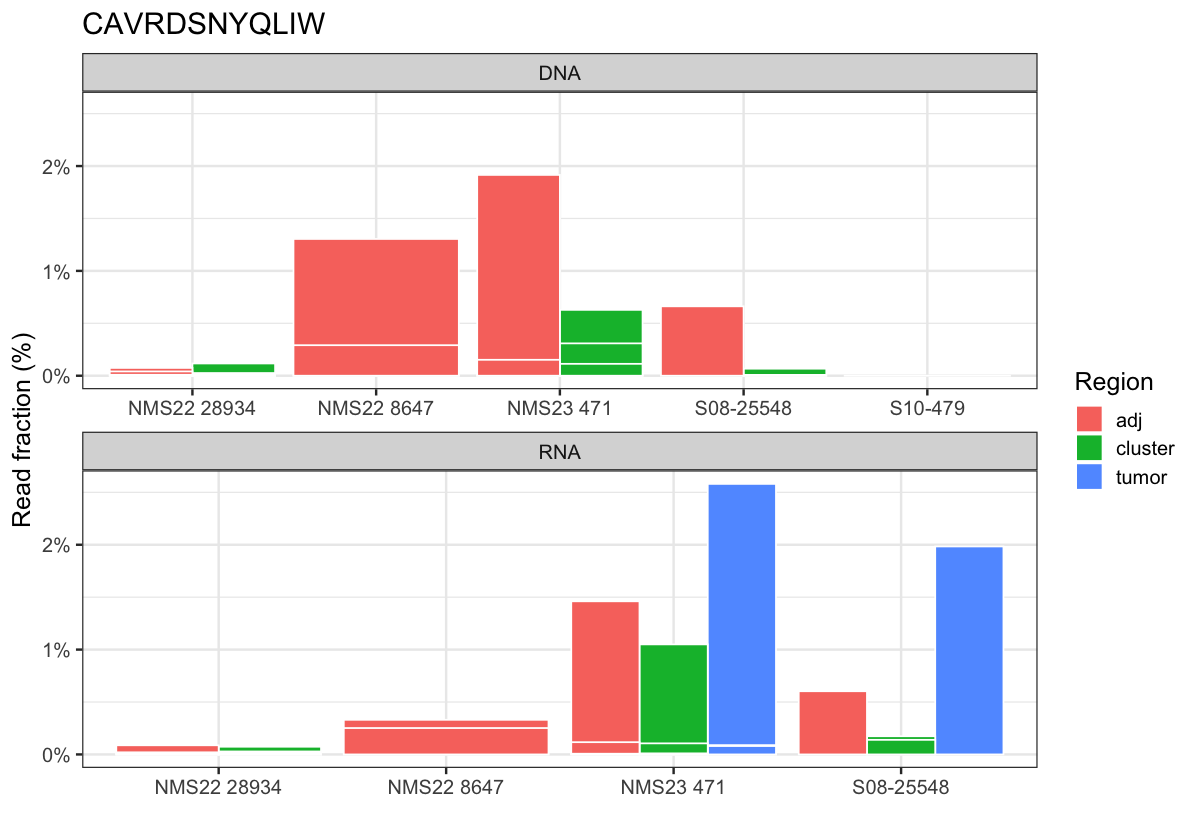

In [24]:
options(repr.plot.width=10, repr.plot.heigh=10)

punch_tra_combined_tbl %>%
    filter(`aaSeqCDR3` == 'CAVRDSNYQLIW') %>%
    ggplot(aes(x=`tumor_name`, y=`readFraction`, fill=`punch_region`)) +
        geom_col(position='dodge', color='white') +
        facet_wrap(~`sample_material`, ncol=1, scales='free_x') +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Read fraction (%)',
            fill='Region',
            title='CAVRDSNYQLIW'
        ) +
        scale_y_continuous(labels=scales::percent)
    
options(org_opts)

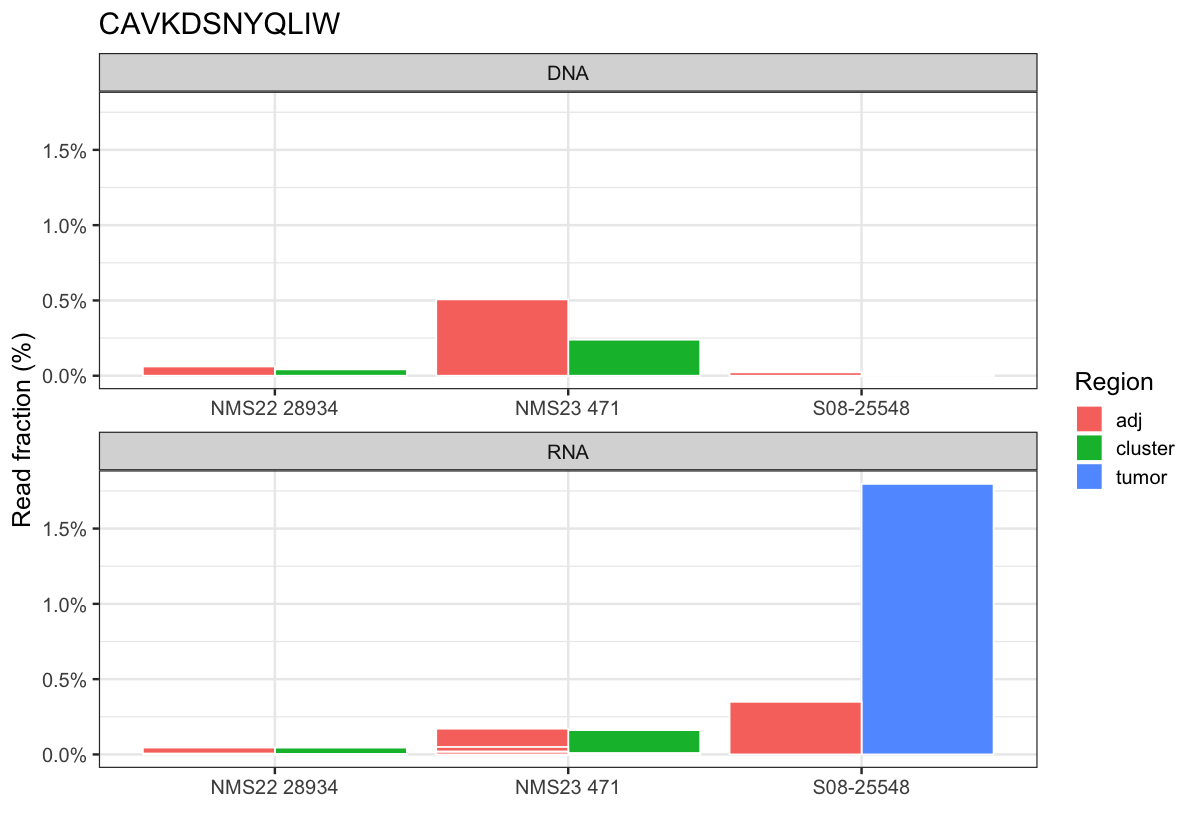

In [25]:
options(repr.plot.width=10, repr.plot.heigh=10)

punch_tra_combined_tbl %>%
    filter(`aaSeqCDR3` == 'CAVKDSNYQLIW') %>%
    ggplot(aes(x=`tumor_name`, y=`readFraction`, fill=`punch_region`)) +
        geom_col(position='dodge', color='white') +
        facet_wrap(~`sample_material`, ncol=1, scales='free_x') +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Read fraction (%)',
            fill='Region',
            title='CAVKDSNYQLIW'
        ) +
        scale_y_continuous(labels=scales::percent)
    
options(org_opts)

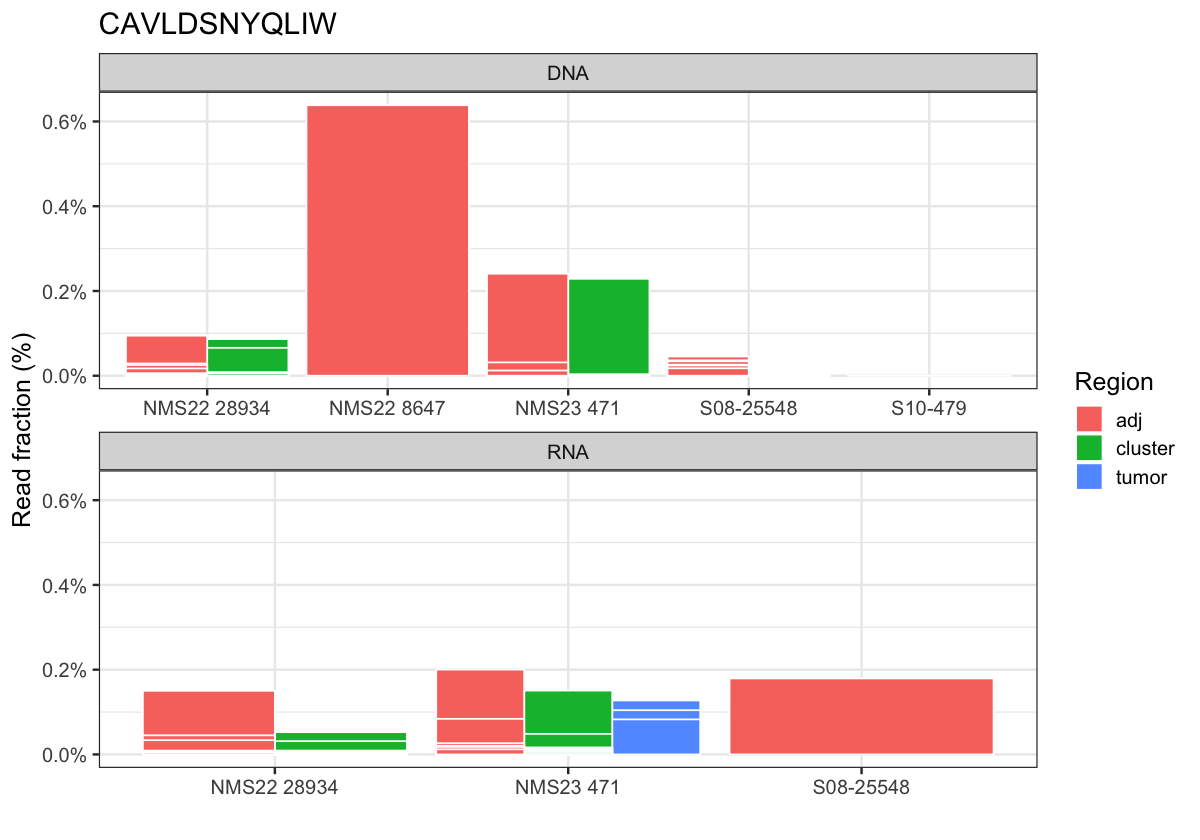

In [26]:
options(repr.plot.width=10, repr.plot.heigh=10)

punch_tra_combined_tbl %>%
    filter(`aaSeqCDR3` == 'CAVLDSNYQLIW') %>%
    ggplot(aes(x=`tumor_name`, y=`readFraction`, fill=`punch_region`)) +
        geom_col(position='dodge', color='white') +
        facet_wrap(~`sample_material`, ncol=1, scales='free_x') +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Read fraction (%)',
            fill='Region',
            title='CAVLDSNYQLIW'
        ) +
        scale_y_continuous(labels=scales::percent)
    
options(org_opts)

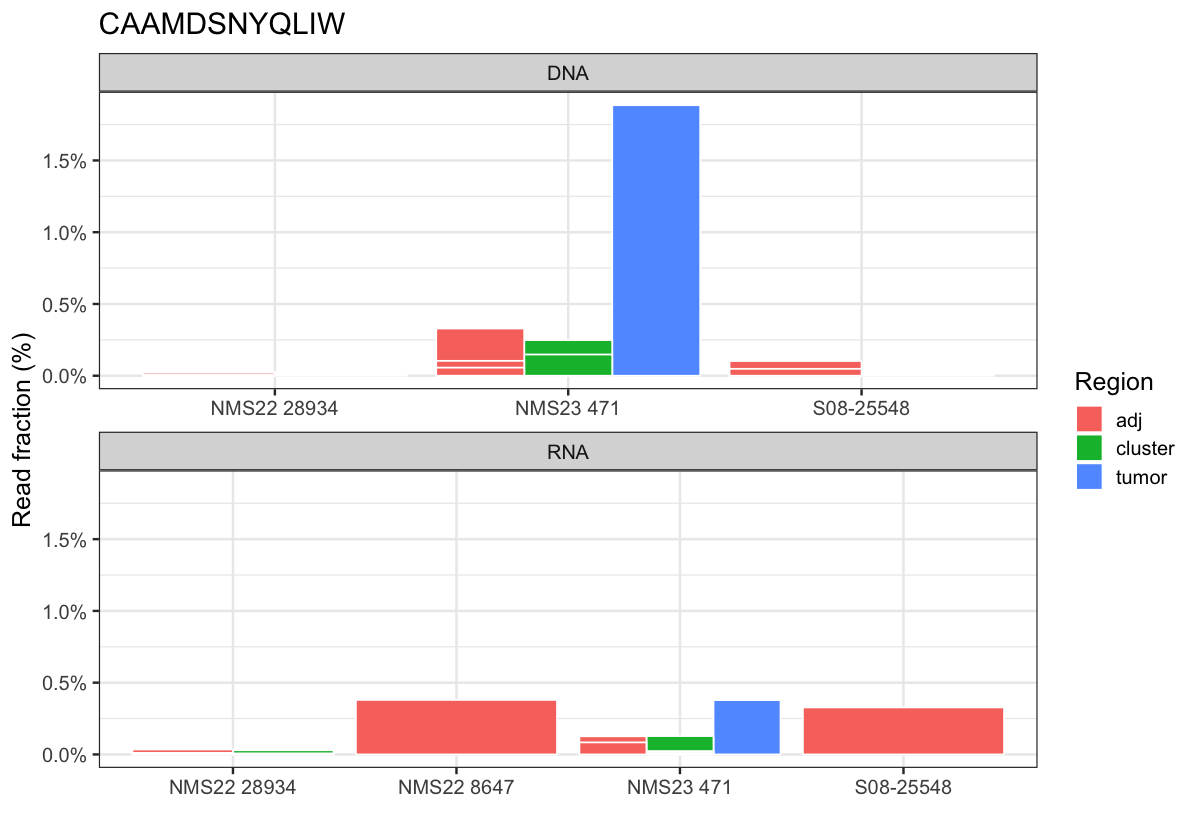

In [27]:
options(repr.plot.width=10, repr.plot.heigh=10)

punch_tra_combined_tbl %>%
    filter(`aaSeqCDR3` == 'CAAMDSNYQLIW') %>%
    ggplot(aes(x=`tumor_name`, y=`readFraction`, fill=`punch_region`)) +
        geom_col(position='dodge', color='white') +
        facet_wrap(~`sample_material`, ncol=1, scales='free_x') +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Read fraction (%)',
            fill='Region',
            title='CAAMDSNYQLIW'
        ) +
        scale_y_continuous(labels=scales::percent)
    
options(org_opts)

In [28]:
punch_tra_combined_tbl %>%
    filter(`aaSeqCDR3` == 'CAASGAGSYQLTF')

cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name,sample_material,description,punch_region,tumor_name,is_MAIT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
115129RN,10817,339,6.876995e-05,1,7.042254e-05,TGTGCAGCAAGCGGAGCTGGGAGTTACCAACTCACTTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV23/DV6*00(488.4),NA,⋯,TGTGCAGCAAGCGGAGCTGGGAGTTACCAACTCACTTTC,45,CAASGAGSYQLTF,:::::::::0:-1:12:::::12:-8:39:::,115129RN_S6.clones_TRA.tsv,RNA,NMS23 471 cluster,cluster,NMS23 471,FALSE
115131DN,13016,1203,2.969709e-04,1,1.420656e-04,TGTGCGGCCTCTGGGGCTGGGAGTTACCAACTCACTTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV25*00(509),NA,⋯,TGTGCGGCCTCTGGGGCTGGGAGTTACCAACTCACTTTC,45,CAASGAGSYQLTF,:::::::::0:-4:5:::::8:-4:39:::,115131DN_S22.clones_TRA.tsv,DNA,S08-25548 cluster,cluster,S08-25548,FALSE
115131DN,3657,611,1.508306e-04,1,1.420656e-04,TGTGCTGCGTCTGGGGCTGGGAGTTACCAACTCACTTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV3*00(547.5),NA,⋯,TGTGCTGCGTCTGGGGCTGGGAGTTACCAACTCACTTTC,45,CAASGAGSYQLTF,:::::::::0:-9:7:::::9:-5:39:::,115131DN_S22.clones_TRA.tsv,DNA,S08-25548 cluster,cluster,S08-25548,FALSE
115134RN,2544,1042,2.001643e-04,1,1.754694e-04,TGTGCTGCCTCTGGGGCTGGGAGTTACCAACTCACTTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV3*00(528.1),NA,⋯,TGTGCTGCCTCTGGGGCTGGGAGTTACCAACTCACTTTC,45,CAASGAGSYQLTF,:::::::::0:-9:7:::::8:-4:39:::,115134RN_S11.clones_TRA.tsv,RNA,NMS23 471 adj,adj,NMS23 471,FALSE
115136DN,867,2463,9.026690e-04,2,6.230530e-04,TGTGCGGCCTCTGGGGCTGGGAGTTACCAACTCACTTTC,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV25*00(508.8),NA,⋯,TGTGCGGCCTCTGGGGCTGGGAGTTACCAACTCACTTTC,58,CAASGAGSYQLTF,:::::::::0:-4:5:::::8:-4:39:::,115136DN_S27.clones_TRA.tsv,DNA,S08-25548 adj,adj,S08-25548,FALSE


# NW 001 comparison

In [29]:
rep_tra <- 
    read_csv('../../tcr/nw001/iRepertoire-170311_2306-RD-0017_Release_/atlas/IL15_REP_TIL__TRA.csv') %>%
    rename(`CDR3`=`junction_aa`) %>%
    group_by(`CDR3`) %>%
    summarize(`duplicate_count`=sum(`duplicate_count`)) %>%
    ungroup() %>%
    mutate(
        `read_fraction`=`duplicate_count`/sum(`duplicate_count`),
        `fraction_str`=scales::percent(`read_fraction`, accuracy=.1)
    ) %>%
    select(`CDR3`, `fraction_str`, `read_fraction`) %>%
    arrange(-`read_fraction`) %>%
    mutate(`is_MAIT`=`CDR3` %in% mait_cdr3_scores$`Sequence`)

rep_tra

Rows: 236 Columns: 16
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (15): sample, dual_index, junction_aa, v_call, j_call, c_call, sequence_...
dbl  (1): duplicate_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CDR3,fraction_str,read_fraction,is_MAIT
<chr>,<chr>,<dbl>,<lgl>
CAMRDGNNRLAF,34.9%,0.3489958228,FALSE
CAVRSLRRF,30.4%,0.3036131499,FALSE
CVVTYTGKLIF,26.9%,0.2689212470,FALSE
CAMREGGNDMRF,0.9%,0.0094399736,FALSE
CAENTGGGNKLTF,0.9%,0.0087083756,FALSE
CVVRKTGANNLFF,0.8%,0.0077879782,FALSE
CAVPLDSSYKLIF,0.6%,0.0058881835,FALSE
CGTEIRAAGNKLTF,0.6%,0.0058291837,FALSE
CVVLSNDYKLSF,0.3%,0.0028201921,TRUE


In [30]:
punch_tra_combined_tbl %>%
    filter(`aaSeqCDR3` %in% rep_tra$`CDR3`) %>%
    group_by(`cellecta_sample_name`, `tumor_name`, `sample_material`, `punch_region`) %>%
    summarize(
        `no_of_shared_clonotypes`=n(),
        `total_shared_clonotypes`=sum(`readFraction`),
        .groups='drop'
    ) %>%
    mutate(`fraction_str`=scales::percent(`total_shared_clonotypes`, accuracy=0.1)) %>%
    arrange(`tumor_name`, `sample_material`, `punch_region`)

cellecta_sample_name,tumor_name,sample_material,punch_region,no_of_shared_clonotypes,total_shared_clonotypes,fraction_str
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
115137DN,NMS22 28934,DNA,adj,3,0.0012478794,0.1%
115132DN,NMS22 28934,DNA,cluster,6,0.0009618767,0.1%
115137RN,NMS22 28934,RNA,adj,10,0.0012539387,0.1%
115132RN,NMS22 28934,RNA,cluster,27,0.0016168382,0.2%
115133DN,NMS22 8647,DNA,adj,6,0.0245311284,2.5%
115124DN,NMS22 8647,DNA,tumor,2,0.0269105966,2.7%
115133RN,NMS22 8647,RNA,adj,8,0.0477756657,4.8%
115124RN,NMS22 8647,RNA,tumor,1,0.0976893812,9.8%
115134DN,NMS23 471,DNA,adj,1,0.0004883206,0.0%


In [31]:
punch_tra_combined_tbl %>%
    filter(`aaSeqCDR3` %in% rep_tra$`CDR3`) %>%
    group_by(`cellecta_sample_name`, `tumor_name`, `sample_material`, `punch_region`, `is_MAIT`) %>%
    summarize(
        `no_of_shared_clonotypes`=n(),
        `total_shared_clonotypes`=sum(`readFraction`),
        .groups='drop'
    ) %>%
    mutate(`fraction_str`=scales::percent(`total_shared_clonotypes`, accuracy=0.1)) %>%
    arrange(`tumor_name`, `sample_material`, `punch_region`) %>%
    filter(!`is_MAIT`)

cellecta_sample_name,tumor_name,sample_material,punch_region,is_MAIT,no_of_shared_clonotypes,total_shared_clonotypes,fraction_str
<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<chr>
115137DN,NMS22 28934,DNA,adj,FALSE,1,6.302256e-04,0.1%
115132DN,NMS22 28934,DNA,cluster,FALSE,3,3.726588e-04,0.0%
115137RN,NMS22 28934,RNA,adj,FALSE,5,5.491295e-04,0.1%
115132RN,NMS22 28934,RNA,cluster,FALSE,10,5.629430e-04,0.1%
115133DN,NMS22 8647,DNA,adj,FALSE,1,5.312600e-03,0.5%
115124DN,NMS22 8647,DNA,tumor,FALSE,1,5.787356e-05,0.0%
115133RN,NMS22 8647,RNA,adj,FALSE,3,1.660030e-02,1.7%
115129RN,NMS23 471,RNA,cluster,FALSE,2,1.349027e-04,0.0%
115136DN,S08-25548,DNA,adj,FALSE,1,2.132982e-04,0.0%


In [32]:
punch_tra_combined_tbl %>%
    filter(
        `aaSeqCDR3` %in% rep_tra$`CDR3`,
        `tumor_name` == 'NMS22 8647',
        !`is_MAIT`
    ) %>%
    arrange(-`readFraction`)

cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name,sample_material,description,punch_region,tumor_name,is_MAIT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
115133RN,41,32786,7.257539e-03,2,0.006514658,TGTGCAGAGAATACGGGAGGAGGAAACAAACTCACCTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV13-2*00(578.3),NA,⋯,TGTGCAGAGAATACGGGAGGAGGAAACAAACTCACCTTT,58,CAENTGGGNKLTF,:::::::::0:0:13:::::13:-7:39:::,115133RN_S10.clones_TRA.tsv,RNA,NMS22 8647 adj,adj,NMS22 8647,FALSE
115133RN,400,25292,5.598661e-03,1,0.003257329,TGTGCAGCAAGTGGGTCCGACAGAGGCTCAACCCTGGGGAGGCTATACTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV13-1*00(946.2),NA,⋯,TGTGCAGCAAGTGGGTCCGACAGAGGCTCAACCCTGGGGAGGCTATACTTT,45,CAASGSDRGSTLGRLYF,:::::::::0:-1:12:::::16:0:51:::,115133RN_S10.clones_TRA.tsv,RNA,NMS22 8647 adj,adj,NMS22 8647,FALSE
115133DN,55,17118,5.312600e-03,2,0.006211180,TGTGCAGAGAATACGGGAGGAGGAAACAAACTCACCTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV13-2*00(578.9),NA,⋯,TGTGCAGAGAATACGGGAGGAGGAAACAAACTCACCTTT,58,CAENTGGGNKLTF,:::::::::0:0:13:::::13:-7:39:::,115133DN_S24.clones_TRA.tsv,DNA,NMS22 8647 adj,adj,NMS22 8647,FALSE
115133RN,204,16914,3.744099e-03,1,0.003257329,TGTGCCGCAGGGGGGAATTCAGGATACAGCACCCTCACCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV12-2*00(423.8),NA,⋯,TGTGCCGCAGGGGGGAATTCAGGATACAGCACCCTCACCTTT,45,CAAGGNSGYSTLTF,:::::::::0:-6:7:::::14:-1:42:::,115133RN_S10.clones_TRA.tsv,RNA,NMS22 8647 adj,adj,NMS22 8647,FALSE
115124DN,23,190,5.787356e-05,1,0.025000000,TGTGCTGTGCAGGCCTTACTTAATGCAGGCAACATGCTCACCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV20*00(567.8),NA,⋯,TGTGCTGTGCAGGCCTTACTTAATGCAGGCAACATGCTCACCTTT,45,CAVQALLNAGNMLTF,:::::::::0:3:16:::::20:-7:45:::,115124DN_S15.clones_TRA.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE


In [33]:
nw001_persistent_clonotypes <-
    c('CAMRDGNNRLAF', 'CAVRSLRRF', 'CVVTYTGKLIF')

punch_tra_combined_tbl %>%
    filter(
        `aaSeqCDR3` %in% nw001_persistent_clonotypes
    )

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name,sample_material,description,punch_region,tumor_name,is_MAIT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
